In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jcdumlao14/Homework-ml-zoomcamp/main/insurance2.csv')


In [ ]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
df['smoker'] = df['smoker'].map({0:'non-smoke',1:'smoker'})
df['sex'] = df['sex'].map({0:'female',1:'male'})
df['insuranceclaim'] = df['insuranceclaim'].map({0:'no',1:'yes'})

In [ ]:
df.iloc[1].to_dict()

{'age': 18,
 'sex': 'male',
 'bmi': 33.77,
 'children': 1,
 'smoker': 'non-smoke',
 'region': 2,
 'charges': 1725.5523,
 'insuranceclaim': 'yes'}

In [ ]:
df.sex = (df.sex == 'male').astype(int)
df.smoker = (df.smoker == 'smoker').astype(int)
df.insuranceclaim = (df.insuranceclaim == 'yes').astype(int)

In [ ]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
df['insuranceclaim'].value_counts(normalize=True)

1    0.585202
0    0.414798
Name: insuranceclaim, dtype: float64

In [ ]:
categorical = ['sex', 'smoker','region','children']

numerical = ['age', 'bmi','charges']

features = numerical + categorical
target = ['insuranceclaim']

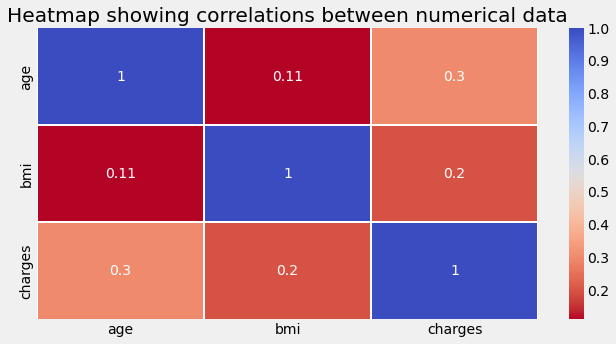

In [ ]:
plt.figure(figsize=(10,5))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="coolwarm_r")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [ ]:
from IPython.display import display

In [ ]:
global_insuranceclaim = df['insuranceclaim'].mean()
global_insuranceclaim

0.5852017937219731

In [ ]:
for c in categorical:
    print(c)
    df_group = df.groupby(c)['insuranceclaim'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_insuranceclaim
    df_group['risk'] = df_group['mean'] / global_insuranceclaim
    display(df_group)
    print()
    print()

sex


,mean,count,diff,risk
sex,,,,
0,0.569486,662,-0.015715,0.973145
1,0.600592,676,0.015390,1.026298




smoker


,mean,count,diff,risk
smoker,,,,
0,0.501880,1064,-0.083322,0.857618
1,0.908759,274,0.323557,1.552899




region


,mean,count,diff,risk
region,,,,
0,0.592593,324,0.007391,1.012629
1,0.501538,325,-0.083663,0.857035
2,0.673077,364,0.087875,1.150162
3,0.563077,325,-0.022125,0.962193




children


,mean,count,diff,risk
children,,,,
0,0.806620,574,0.221418,1.378363
1,0.533951,324,-0.051251,0.912421
2,0.391667,240,-0.193535,0.669285
3,0.286624,157,-0.298578,0.489787
4,0.160000,25,-0.425202,0.273410
5,0.222222,18,-0.362980,0.379736


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def mutual_info_insurance_score(series):
    return mutual_info_score(series, df['insuranceclaim'])

In [ ]:
mi = df[categorical].apply(mutual_info_insurance_score)
mi.sort_values(ascending=False)

children    0.094866
smoker      0.064820
region      0.008166
sex         0.000498
dtype: float64